# TRAIN A SIMPLE MODEL

Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# preprocess the data
# if there is a problem pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# train the model
# problem longpath https://www.youtube.com/watch?v=uMxDjyOgLcI
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Load the data

In [2]:
df = pd.read_csv("HRDataset_v14.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


List all the variables

In [3]:
print("All variables:")
for col in df.columns:
    print("-", col)

All variables:
- Employee_Name
- EmpID
- MarriedID
- MaritalStatusID
- GenderID
- EmpStatusID
- DeptID
- PerfScoreID
- FromDiversityJobFairID
- Salary
- Termd
- PositionID
- Position
- State
- Zip
- DOB
- Sex
- MaritalDesc
- CitizenDesc
- HispanicLatino
- RaceDesc
- DateofHire
- DateofTermination
- TermReason
- EmploymentStatus
- Department
- ManagerName
- ManagerID
- RecruitmentSource
- PerformanceScore
- EngagementSurvey
- EmpSatisfaction
- SpecialProjectsCount
- LastPerformanceReview_Date
- DaysLateLast30
- Absences


Descriptive of the target / dependent variable

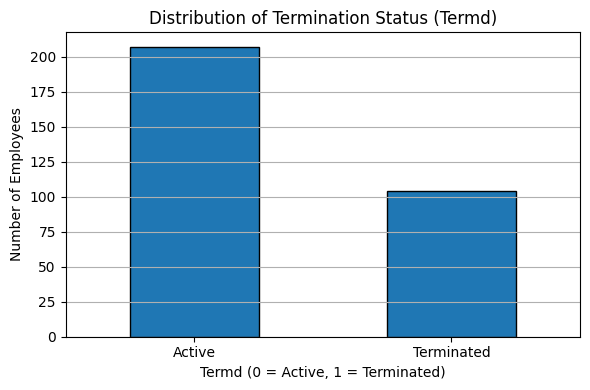

In [4]:
# Plot a bar chart for Termd values
plt.figure(figsize=(6, 4))
df['Termd'].value_counts().sort_index().plot(kind='bar', edgecolor='black')

# Add labels and title
plt.title('Distribution of Termination Status (Termd)')
plt.xlabel('Termd (0 = Active, 1 = Terminated)')
plt.ylabel('Number of Employees')
plt.xticks(ticks=[0, 1], labels=['Active', 'Terminated'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

Clean the data

In [5]:
# Drop columns that are mostly text, IDs, or not useful for a simple model
""" columns_to_drop = [
    'Employee_Name', 'EmpID', 'TermReason', 'Position', 'State', 'Zip', 'DOB',
    'Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'DateofHire', 'DateofTermination',
    'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource',
    'PerformanceScore', 'LastPerformanceReview_Date'
] """

columns_to_drop = [
    'Employee_Name', 'EmpID', 'TermReason', 'Position', 'State', 'Zip', 'DOB',
    'Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'DateofHire', 'DateofTermination',
    'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource',
    'PerformanceScore', 'LastPerformanceReview_Date'
]

# Drop those columns
df_clean = df.drop(columns=columns_to_drop)

# Drop rows with any missing values
df_clean = df_clean.dropna()

# Show shape and columns after cleaning
print("✅ Cleaned dataset shape:", df_clean.shape)
print("📋 Variables used:")
for col in df_clean.columns:
    print("-", col)

✅ Cleaned dataset shape: (303, 17)
📋 Variables used:
- MarriedID
- MaritalStatusID
- GenderID
- EmpStatusID
- DeptID
- PerfScoreID
- FromDiversityJobFairID
- Salary
- Termd
- PositionID
- HispanicLatino
- ManagerID
- EngagementSurvey
- EmpSatisfaction
- SpecialProjectsCount
- DaysLateLast30
- Absences


Pre process the variable

What We Do and Why:

| Task                            | What it Does                                 | Why it's Important                                |
|---------------------------------|-----------------------------------------------|---------------------------------------------------|
| 1️⃣ Separate features and target | `X = predictors`, `y = Termd`                 | We need to tell the model what to predict.        |
| 2️⃣ Encode categorical columns   | Convert text like “yes”/“no” into numbers     | Models can’t work with strings directly.          |
| 3️⃣ Scale numeric values         | Standardize to mean = 0, std = 1              | Makes training faster and more stable.            |
| 4️⃣ Split into train/test        | 80% for training, 20% for testing             | To check how well the model generalizes.          |

In [6]:
# 1️⃣ Separate features and target
X = df_clean.drop(columns='Termd')
y = df_clean['Termd']

# 2️⃣ Encode categorical columns
# (HispanicLatino is the only column with 'yes'/'no')
if X['HispanicLatino'].dtype == 'object':
    le = LabelEncoder()
    X['HispanicLatino'] = le.fit_transform(X['HispanicLatino'])

# 3️⃣ Scale numerical values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Print results
print("✅ Preprocessing complete.")
print("🔢 Training data shape:", X_train.shape)
print("🔢 Test data shape:", X_test.shape)

✅ Preprocessing complete.
🔢 Training data shape: (242, 16)
🔢 Test data shape: (61, 16)


Train the model

Now that the dataset is cleaned and preprocessed, we will train a **basic neural network using TensorFlow** to predict whether an employee will be terminated (`Termd`).

### Model Structure:
- **Input Layer**: Takes the 16 preprocessed features.
- **Hidden Layer 1**: 16 neurons with ReLU activation.
- **Hidden Layer 2**: 8 neurons with ReLU activation.
- **Output Layer**: 1 neuron with sigmoid activation (for binary classification).

### Why This Model?
This model is intentionally simple:
- ✅ It’s fast to train.
- ✅ It allows us to **observe biases** before we apply debiasing.
- ✅ It's good for initial benchmarking.

### Compilation Details:
- **Loss Function**: `binary_crossentropy` (ideal for binary classification).
- **Optimizer**: `adam` (robust default optimizer).
- **Metrics**: `accuracy` to measure correct classifications.

Once trained, the model is evaluated on the test set and its performance (accuracy) is printed.

In [7]:
# 1️⃣ Define a simple neural network
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # input layer
    Dense(8, activation='relu'),                                     # hidden layer
    Dense(1, activation='sigmoid')                                   # output layer (binary classification)
])

# 2️⃣ Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 3️⃣ Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=16,
    verbose=1
)

# 4️⃣ Evaluate performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/30


C:\Users\jesus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5363 - loss: 0.6952 - val_accuracy: 0.5738 - val_loss: 0.7024
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6241 - loss: 0.6622 - val_accuracy: 0.5902 - val_loss: 0.6812
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7059 - loss: 0.6198 - val_accuracy: 0.6230 - val_loss: 0.6647
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6986 - loss: 0.6196 - val_accuracy: 0.6230 - val_loss: 0.6481
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6804 - loss: 0.5927 - val_accuracy: 0.6066 - val_loss: 0.6318
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6872 - loss: 0.5743 - val_accuracy: 0.6230 - val_loss: 0.6158
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7127 - loss: 0.5303 - val_accuracy: 0.6393 - val_loss: 0.5985
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6623 - loss: 0.5292 - val_accuracy: 0.6393 - val_loss: 0.5824
Ep

# COMPARE MODEL PERFORMANCE

Split the test set by gender

Separate X_test and y_test into two groups: Male and Female based on the GenderID column (typically 0 = Female, 1 = Male).

Evaluate the Model Separately.

In [8]:
df_clean = df_clean.reset_index(drop=True)

## Gender


In [9]:
# Split data
X = df_clean.drop(columns=['Termd'])
y = df_clean['Termd']
gender_series = df_clean['GenderID']  # Save GenderID

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
X_test_numeric = X_test.copy()
X_test_numeric = X_test_numeric.apply(pd.to_numeric, errors='coerce')  # force numeric
y_probs = model.predict(X_test_numeric).flatten()

results_df = pd.DataFrame({
    'true_label': y_test.values,
    'predicted_prob': y_probs,
    'GenderID': gender_series.iloc[X_test.index].values
})

# Optional: decode GenderID if 0 = Female, 1 = Male
results_df['Gender'] = results_df['GenderID'].map({0: 'Female', 1: 'Male'})


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [11]:
results_df.groupby('Gender')['predicted_prob'].mean()

Gender
Female    0.48949
Male      0.48949
Name: predicted_prob, dtype: float32

No bias in how much risk the model assigns to men vs. women.

## HispanicLatino

In [12]:
# reset df clean
# Drop those columns
df_clean = df.drop(columns=columns_to_drop)

# Drop rows with any missing values
df_clean = df_clean.dropna()

In [13]:
# extract the values from the original df_clean before splitting:
hispanic_series = df_clean['HispanicLatino'].reset_index(drop=True)

In [14]:
#  After train-test split, align it to test set:
results_df['HispanicLatino'] = hispanic_series.iloc[X_test.index].values


In [ ]:
# Analyze predictions by Hispanic/Latino status
results_df.groupby('HispanicLatino')['predicted_prob'].mean()

HispanicLatino
No     0.48949
Yes    0.48949
Name: predicted_prob, dtype: float32

We have the same result. That means that the model has no differences among these groups.